<a href="https://colab.research.google.com/github/jay-madane/ML_clg_labs/blob/main/ml_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning 6
##Comparison Analysis of all Ensemble Techniques

####Name: Sejal Ramesh Balkhande
####PRN: RBT21CB052
####Title: Identifying the Best Machine Learning Ensemble Technique for finding out any structure in Ionosphere.
####Aim: To train and evaluate a variety of machine learning ensemble techniques on a given dataset, in order to identify the best technique for a given task or dataset.
####Dataset: Ionosphere
####Theory:
Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule.

**Types of boosting**

*Adaptive boosting or AdaBoost*: Yoav Freund and Robert Schapire are credited with the creation of the AdaBoost algorithm. This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor.

*Gradient boosting*: Building on the work of Leo Breiman, Jerome H. Friedman developed gradient boosting, which works by sequentially adding predictors to an ensemble with each one correcting for the errors of its predecessor. However, instead of changing weights of data points like AdaBoost, the gradient boosting trains on the residual errors of the previous predictor. The name, gradient boosting, is used since it combines the gradient descent algorithm and boosting method.  

*Extreme gradient boosting or XGBoost*: XGBoost is an implementation of gradient boosting that's designed for computational speed and scale. XGBoost leverages multiple cores on the CPU, allowing for learning to occur in parallel during training.  

#### Code:

In [ ]:
pip install catboost

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the Ionosphere dataset from sklearn
data = fetch_openml(name='ionosphere', version=1, as_frame=True)
df = data.frame

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   a01     351 non-null    float64 
 1   a02     351 non-null    float64 
 2   a03     351 non-null    float64 
 3   a04     351 non-null    float64 
 4   a05     351 non-null    float64 
 5   a06     351 non-null    float64 
 6   a07     351 non-null    float64 
 7   a08     351 non-null    float64 
 8   a09     351 non-null    float64 
 9   a10     351 non-null    float64 
 10  a11     351 non-null    float64 
 11  a12     351 non-null    float64 
 12  a13     351 non-null    float64 
 13  a14     351 non-null    float64 
 14  a15     351 non-null    float64 
 15  a16     351 non-null    float64 
 16  a17     351 non-null    float64 
 17  a18     351 non-null    float64 
 18  a19     351 non-null    float64 
 19  a20     351 non-null    float64 
 20  a21     351 non-null    float64 
 21  a22     351 non-

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   a01  a02      a03      a04      a05      a06      a07      a08      a09  \
0  1.0  0.0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1  1.0  0.0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2  1.0  0.0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3  1.0  0.0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4  1.0  0.0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

       a10  ...      a26      a27      a28      a29      a30      a31  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

       a32      a33      a34  class  
0 -0.54487  0.18641 -0.45300      g  
1 -0.06288 -0.13

In [ ]:
# Check for missing values
print(df.isnull().sum())

a01      0
a02      0
a03      0
a04      0
a05      0
a06      0
a07      0
a08      0
a09      0
a10      0
a11      0
a12      0
a13      0
a14      0
a15      0
a16      0
a17      0
a18      0
a19      0
a20      0
a21      0
a22      0
a23      0
a24      0
a25      0
a26      0
a27      0
a28      0
a29      0
a30      0
a31      0
a32      0
a33      0
a34      0
class    0
dtype: int64


In [ ]:
# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

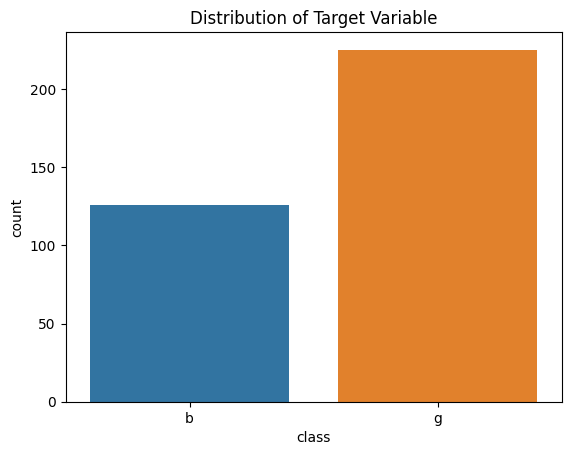

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='class', data=df)
plt.title('Distribution of Target Variable')
plt.show()

<ipython-input-33-0b40d4446533>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


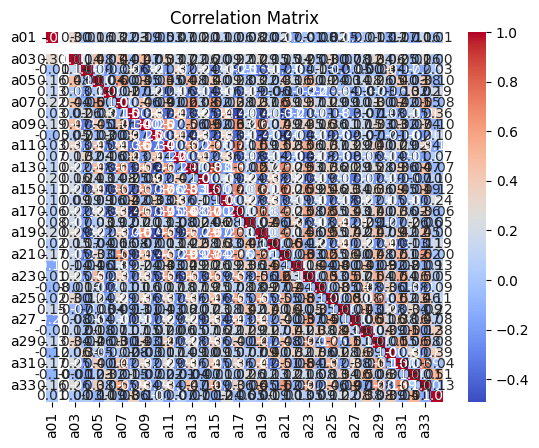

In [ ]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Ensemble techniques comparison
models = {
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

In [ ]:
y_train_encoded = y_train.replace({'b': 0, 'g': 1})
y_test_encoded = y_test.replace({'b': 0, 'g': 1})

In [ ]:
results = {}

for name, model in models.items():
    if name == 'XGBoost':
        model.fit(X_train_scaled, y_train_encoded)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        results[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Classification Report:\n{classification_report(y_test_encoded, y_pred)}")
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

AdaBoost Accuracy: 0.9296
AdaBoost Classification Report:
              precision    recall  f1-score   support

           b       0.93      0.89      0.91        28
           g       0.93      0.95      0.94        43

    accuracy                           0.93        71
   macro avg       0.93      0.92      0.93        71
weighted avg       0.93      0.93      0.93        71

Gradient Boosting Accuracy: 0.9296
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           b       0.96      0.86      0.91        28
           g       0.91      0.98      0.94        43

    accuracy                           0.93        71
   macro avg       0.94      0.92      0.92        71
weighted avg       0.93      0.93      0.93        71

XGBoost Accuracy: 0.9296
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.91      0.98      0.94    